In [ ]:
A

   launch_condition  satellite_condition  weather_condition  space_traffic  \
0                 0                    1                  0              1   
1                 1                    0                  1              1   
2                 0                    0                  1              1   
3                 0                    0                  1              1   
4                 0                    0                  1              0   

   solar_activity  mission_success  
0               1                0  
1               0                0  
2               0                0  
3               0                0  
4               1                0  

Model Accuracy: 1.0

Confusion Matrix:
 [[170   0]
 [  0  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
  

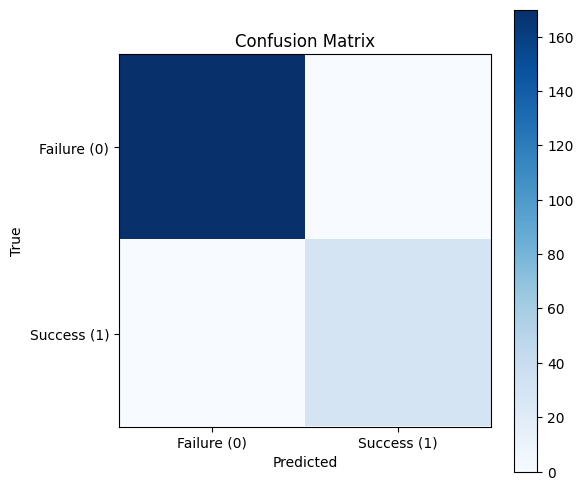

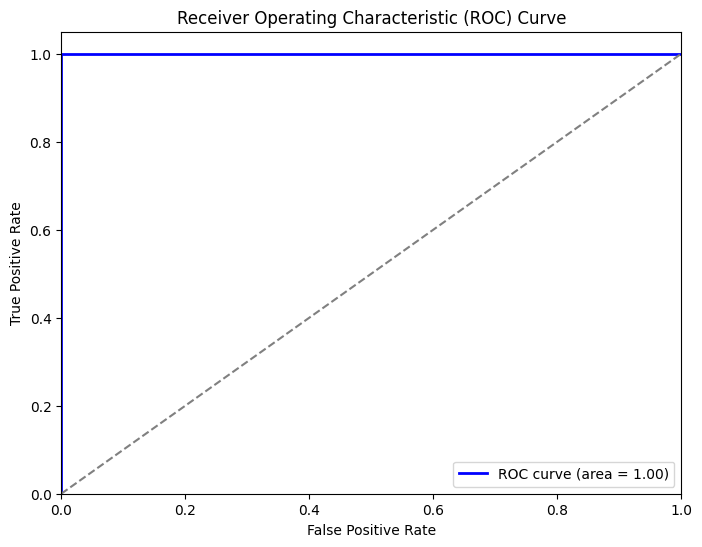

   launch_condition  satellite_condition  weather_condition  space_traffic  \
0                 0                    1                  0              1   
1                 1                    0                  1              1   
2                 0                    0                  1              1   
3                 0                    0                  1              1   
4                 0                    0                  1              0   

   solar_activity  mission_success  
0               1                0  
1               0                0  
2               0                0  
3               0                0  
4               1                0  

Model Accuracy: 1.0

Confusion Matrix:
 [[170   0]
 [  0  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
  

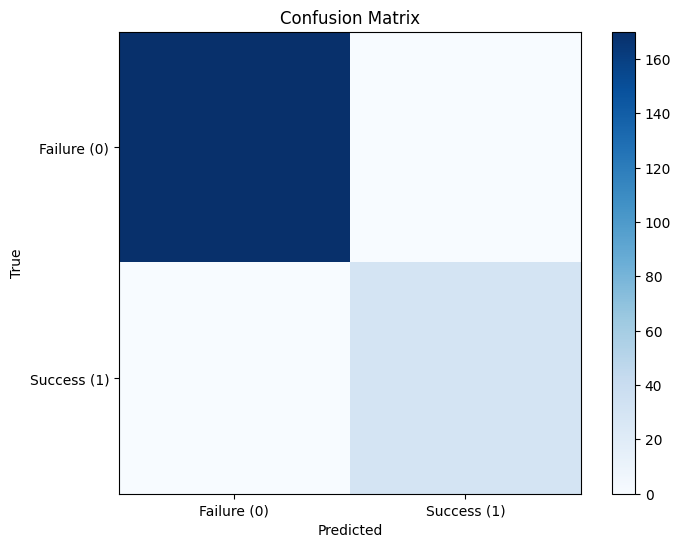

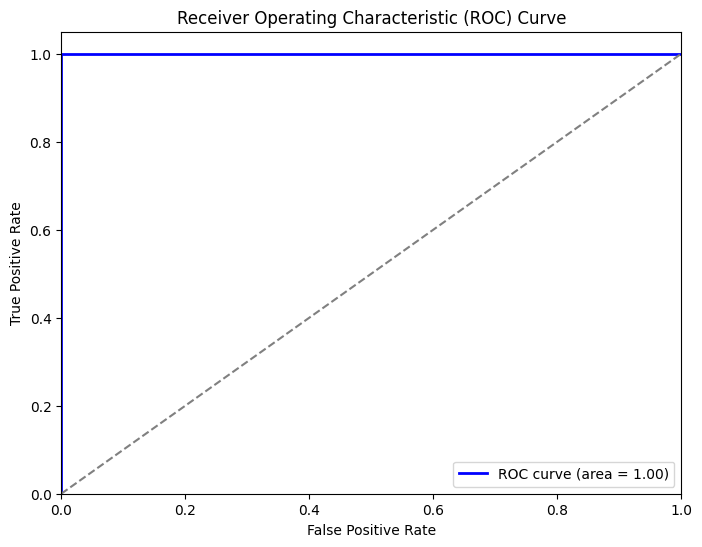

   launch_condition  satellite_condition  weather_condition  space_traffic  \
0                 0                    1                  0              1   
1                 1                    0                  1              1   
2                 0                    0                  1              1   
3                 0                    0                  1              1   
4                 0                    0                  1              0   

   solar_activity  mission_success  
0               1                0  
1               0                0  
2               0                0  
3               0                0  
4               1                0  

Model Accuracy: 1.0

Confusion Matrix:
 [[170   0]
 [  0  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
  

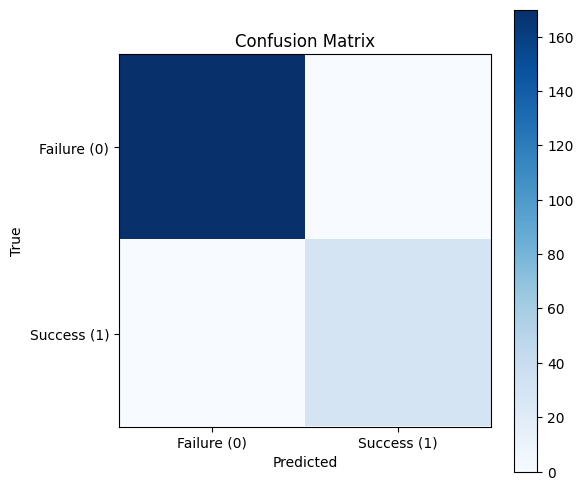

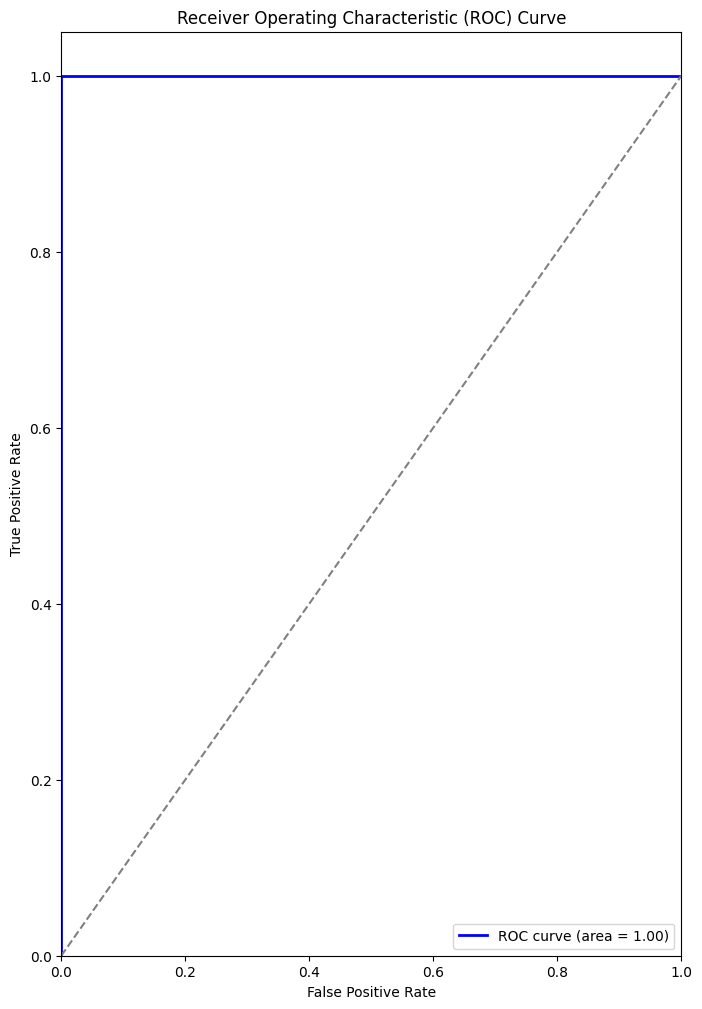

   launch_condition  satellite_condition  weather_condition  space_traffic  \
0                 0                    1                  0              1   
1                 1                    0                  1              1   
2                 0                    0                  1              1   
3                 0                    0                  1              1   
4                 0                    0                  1              0   

   solar_activity  mission_success  
0               1                0  
1               0                0  
2               0                0  
3               0                0  
4               1                0  

Model Accuracy: 1.0

Confusion Matrix:
 [[170   0]
 [  0  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
  

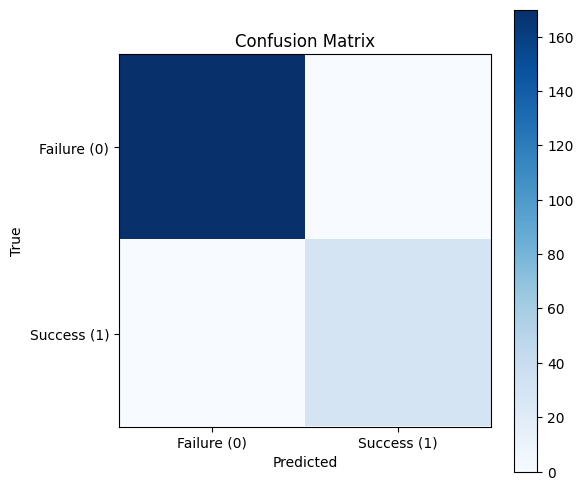

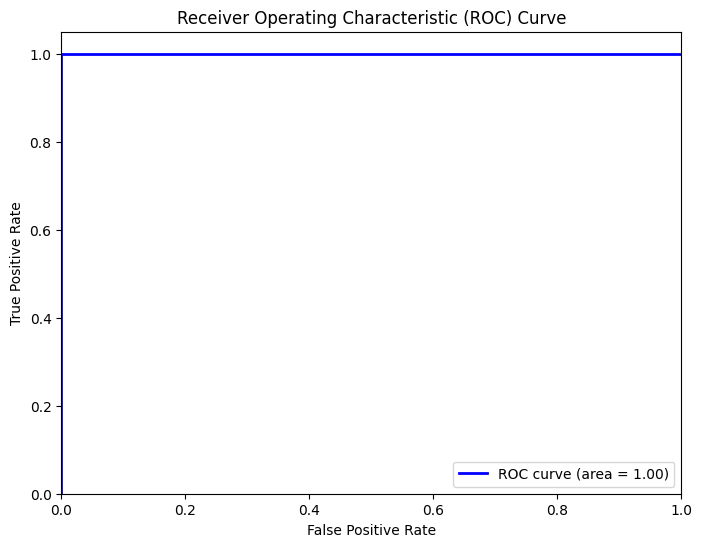

   launch_condition  satellite_condition  weather_condition  space_traffic  \
0                 0                    1                  0              1   
1                 1                    0                  1              1   
2                 0                    0                  1              1   
3                 0                    0                  1              1   
4                 0                    0                  1              0   

   solar_activity  mission_success  
0               1                0  
1               0                0  
2               0                0  
3               0                0  
4               1                0  

Model Accuracy: 1.0

Confusion Matrix:
 [[170   0]
 [  0  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
  

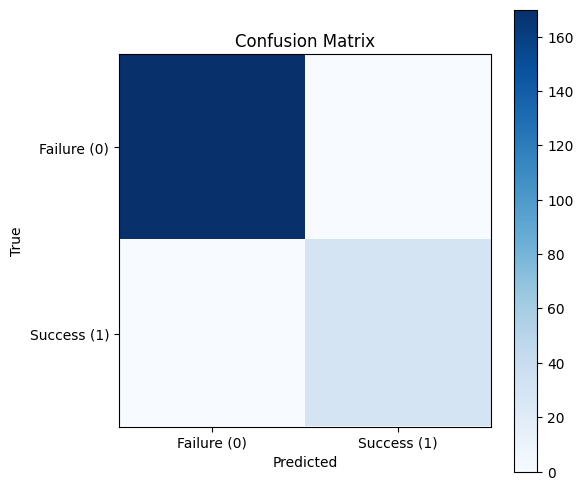

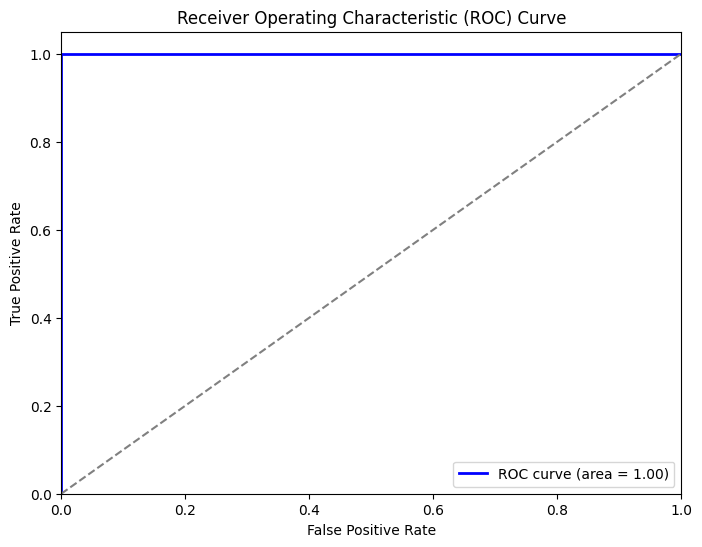

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Simulate a space mission dataset
np.random.seed(42)

# Generate synthetic features for the space mission
data = {
    'launch_condition': np.random.randint(0, 2, 1000),
    'satellite_condition': np.random.randint(0, 2, 1000),
    'weather_condition': np.random.randint(0, 2, 1000),
    'space_traffic': np.random.randint(0, 2, 1000),
    'solar_activity': np.random.randint(0, 2, 1000),
}

# Outcome variable: 1 = success, 0 = failure
# Simulate mission success based on conditions
data['mission_success'] = (
    (data['launch_condition'] + data['satellite_condition'] + data['weather_condition']
     - data['space_traffic'] - data['solar_activity']) >= 2
).astype(int)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Feature Selection (X) and Target Variable (y)
X = df.drop(columns=['mission_success'])  # Features
y = df['mission_success']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict the mission success on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model evaluation results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Probability Predictions (probability of success)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Plotting a ROC curve to see the model performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#1ST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Simulate a space mission dataset
np.random.seed(42)

# Generate synthetic features for the space mission
data = {
    'launch_condition': np.random.randint(0, 2, 1000),
    'satellite_condition': np.random.randint(0, 2, 1000),
    'weather_condition': np.random.randint(0, 2, 1000),
    'space_traffic': np.random.randint(0, 2, 1000),
    'solar_activity': np.random.randint(0, 2, 1000),
}

# Outcome variable: 1 = success, 0 = failure
# Simulate mission success based on conditions
data['mission_success'] = (
    (data['launch_condition'] + data['satellite_condition'] + data['weather_condition']
     - data['space_traffic'] - data['solar_activity']) >= 2
).astype(int)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Feature Selection (X) and Target Variable (y)
X = df.drop(columns=['mission_success'])  # Features
y = df['mission_success']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict the mission success on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model evaluation results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Probability Predictions (probability of success)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Plotting a ROC curve to see the model performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#2ND
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Simulate a space mission dataset
np.random.seed(42)

# Generate synthetic features for the space mission
data = {
    'launch_condition': np.random.randint(0, 2, 1000),
    'satellite_condition': np.random.randint(0, 2, 1000),
    'weather_condition': np.random.randint(0, 2, 1000),
    'space_traffic': np.random.randint(0, 2, 1000),
    'solar_activity': np.random.randint(0, 2, 1000),
}

# Outcome variable: 1 = success, 0 = failure
# Simulate mission success based on conditions
data['mission_success'] = (
    (data['launch_condition'] + data['satellite_condition'] + data['weather_condition']
     - data['space_traffic'] - data['solar_activity']) >= 2
).astype(int)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Feature Selection (X) and Target Variable (y)
X = df.drop(columns=['mission_success'])  # Features
y = df['mission_success']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict the mission success on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model evaluation results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Probability Predictions (probability of success)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Plotting a ROC curve to see the model performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,12))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#3RD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Simulate a space mission dataset
np.random.seed(42)

# Generate synthetic features for the space mission
data = {
    'launch_condition': np.random.randint(0, 2, 1000),
    'satellite_condition': np.random.randint(0, 2, 1000),
    'weather_condition': np.random.randint(0, 2, 1000),
    'space_traffic': np.random.randint(0, 2, 1000),
    'solar_activity': np.random.randint(0, 2, 1000),
}

# Outcome variable: 1 = success, 0 = failure
# Simulate mission success based on conditions
data['mission_success'] = (
    (data['launch_condition'] + data['satellite_condition'] + data['weather_condition']
     - data['space_traffic'] - data['solar_activity']) >= 2
).astype(int)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Feature Selection (X) and Target Variable (y)
X = df.drop(columns=['mission_success'])  # Features
y = df['mission_success']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict the mission success on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model evaluation results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Probability Predictions (probability of success)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Plotting a ROC curve to see the model performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1, 1], [1, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#4RTH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Simulate a space mission dataset
np.random.seed(42)

# Generate synthetic features for the space mission
data = {
    'launch_condition': np.random.randint(0, 2, 1000),
    'satellite_condition': np.random.randint(0, 2, 1000),
    'weather_condition': np.random.randint(0, 2, 1000),
    'space_traffic': np.random.randint(0, 2, 1000),
    'solar_activity': np.random.randint(0, 2, 1000),
}

# Outcome variable: 1 = success, 0 = failure
# Simulate mission success based on conditions
data['mission_success'] = (
    (data['launch_condition'] + data['satellite_condition'] + data['weather_condition']
     - data['space_traffic'] - data['solar_activity']) >= 2
).astype(int)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Feature Selection (X) and Target Variable (y)
X = df.drop(columns=['mission_success'])  # Features
y = df['mission_success']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict the mission success on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model evaluation results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Probability Predictions (probability of success)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Plotting a ROC curve to see the model performance
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




